In [5]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.utils import resample
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB

In [4]:
# Load dataset
df = pd.read_csv('pet_adoption_data.csv',encoding='latin-1')
df.head()

,PetID,PetType,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,500,Bird,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,501,Rabbit,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,502,Dog,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,503,Bird,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,504,Rabbit,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [6]:
#show row and column 
df.shape

(2007, 13)

In [7]:
# drop column PetID
df.drop('PetID', axis=1, inplace=True)

In [8]:
#find missing data
df.isnull().sum()

PetType               0
Breed                 0
AgeMonths             0
Color                 0
Size                  0
WeightKg              0
Vaccinated            0
HealthCondition       0
TimeInShelterDays     0
AdoptionFee           0
PreviousOwner         0
AdoptionLikelihood    0
dtype: int64

In [9]:
#find max min count mean and data type
df.describe(include='all').T[['count','mean', 'min', 'max']]

,count,mean,min,max
PetType,2007,NaN,NaN,NaN
Breed,2007,NaN,NaN,NaN
AgeMonths,2007.0,92.279522,1.0,179.0
Color,2007,NaN,NaN,NaN
Size,2007,NaN,NaN,NaN
WeightKg,2007.0,15.705776,1.018198,29.995628
Vaccinated,2007.0,0.701046,0.0,1.0
HealthCondition,2007.0,0.196313,0.0,1.0
TimeInShelterDays,2007.0,43.974091,1.0,89.0
AdoptionFee,2007.0,249.142003,0.0,499.0


In [10]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             2007 non-null   object 
 1   Breed               2007 non-null   object 
 2   AgeMonths           2007 non-null   int64  
 3   Color               2007 non-null   object 
 4   Size                2007 non-null   object 
 5   WeightKg            2007 non-null   float64
 6   Vaccinated          2007 non-null   int64  
 7   HealthCondition     2007 non-null   int64  
 8   TimeInShelterDays   2007 non-null   int64  
 9   AdoptionFee         2007 non-null   int64  
 10  PreviousOwner       2007 non-null   int64  
 11  AdoptionLikelihood  2007 non-null   int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 188.3+ KB


In [11]:
#copy df to df1 
df1 = df.copy()

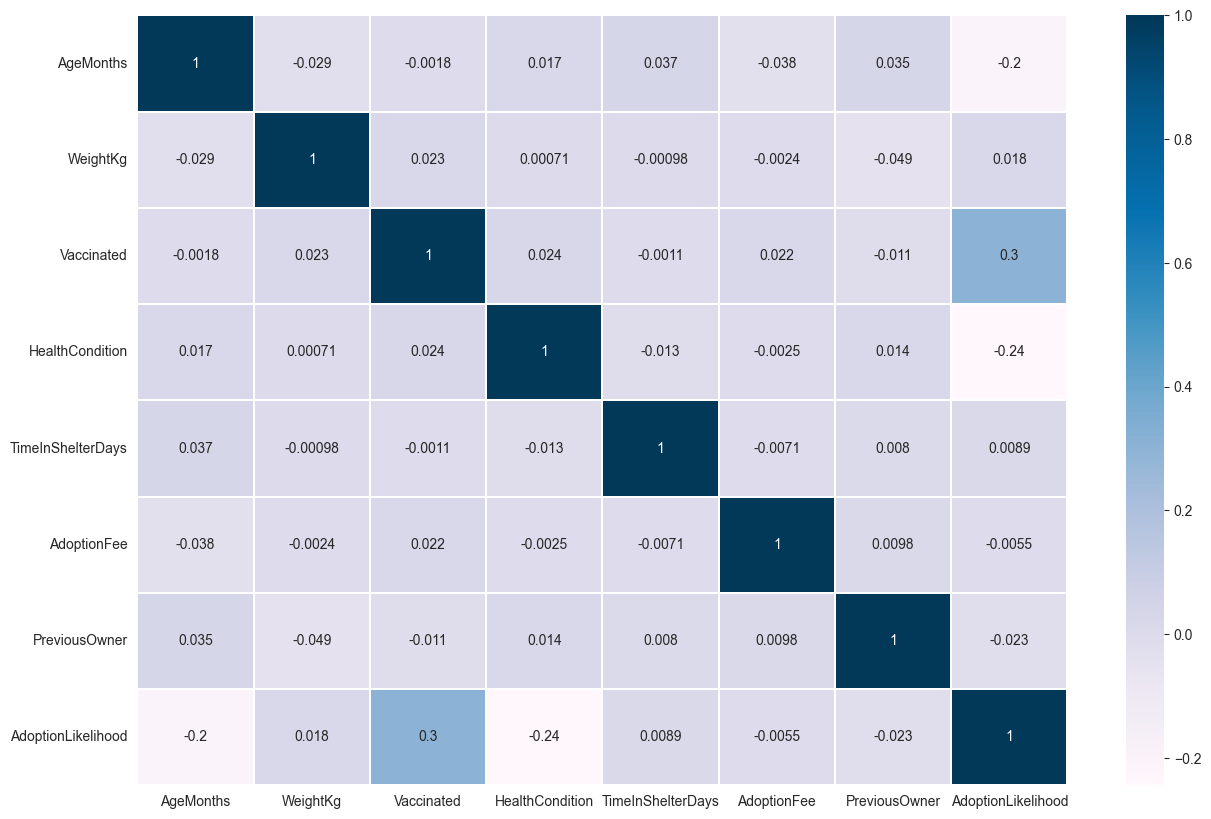

In [12]:
#correlations between features
numeric_df1 = df1.select_dtypes(include=['int','float'])
corr=numeric_df1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='PuBu', linewidths=0.1)
plt.show()

In [13]:
one_hot_encoding = OneHotEncoder(sparse_output=False)
one_hot_encoding

OneHotEncoder(sparse_output=False)

In [14]:
df['PetType'].head()

0      Bird
1    Rabbit
2       Dog
3      Bird
4    Rabbit
Name: PetType, dtype: object

In [15]:
df['PetType'].unique()

array(['Bird', 'Rabbit', 'Dog', 'Cat'], dtype=object)

In [16]:
precip_encoded = one_hot_encoding.fit_transform(df[['PetType']])
precip_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [17]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['PetType_Bird', 'PetType_Cat', 'PetType_Dog', 'PetType_Rabbit'],
      dtype=object)

In [18]:
df1.drop('PetType', axis=1, inplace=True)

In [19]:
df1.head()

,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood
0,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0
1,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0
2,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0
3,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0
4,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0


In [20]:
precip_encoded = one_hot_encoding.fit_transform(df[['PetType']])
precip_encoded

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [21]:
df['Breed'].head()

0            Parakeet
1              Rabbit
2    Golden Retriever
3            Parakeet
4              Rabbit
Name: Breed, dtype: object

In [22]:
df['Breed'].unique()

array(['Parakeet', 'Rabbit', 'Golden Retriever', 'Labrador', 'Siamese',
       'Persian', 'Poodle'], dtype=object)

In [23]:
precip_encoded = one_hot_encoding.fit_transform(df[['Breed']])
precip_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [24]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Parakeet',
       'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit', 'Breed_Siamese'],
      dtype=object)

In [25]:
df1[new_column_names] = precip_encoded.astype(int)
df1.head()

,Breed,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese
0,Parakeet,131,Orange,Large,5.039768,1,0,27,140,0,0,0,0,1,0,0,0,0
1,Rabbit,73,White,Large,16.086727,0,0,8,235,0,0,0,0,0,0,0,1,0
2,Golden Retriever,136,Orange,Medium,2.076286,0,0,85,385,0,0,1,0,0,0,0,0,0
3,Parakeet,97,White,Small,3.339423,0,0,61,217,1,0,0,0,1,0,0,0,0
4,Rabbit,123,Gray,Large,20.498100,0,0,28,14,1,0,0,0,0,0,0,1,0


In [26]:
df1.drop('Breed', axis=1, inplace=True)

In [27]:
df1.head()

,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,Breed_Golden Retriever,Breed_Labrador,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese
0,131,Orange,Large,5.039768,1,0,27,140,0,0,0,0,1,0,0,0,0
1,73,White,Large,16.086727,0,0,8,235,0,0,0,0,0,0,0,1,0
2,136,Orange,Medium,2.076286,0,0,85,385,0,0,1,0,0,0,0,0,0
3,97,White,Small,3.339423,0,0,61,217,1,0,0,0,1,0,0,0,0
4,123,Gray,Large,20.498100,0,0,28,14,1,0,0,0,0,0,0,1,0


In [28]:
precip_encoded = one_hot_encoding.fit_transform(df[['Breed']])
precip_encoded

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [29]:
df['Color'].head()

0    Orange
1     White
2    Orange
3     White
4      Gray
Name: Color, dtype: object

In [30]:
df['Color'].unique()

array(['Orange', 'White', 'Gray', 'Brown', 'Black'], dtype=object)

In [31]:
precip_encoded = one_hot_encoding.fit_transform(df[['Color']])
precip_encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [32]:
new_column_names = one_hot_encoding.get_feature_names_out()
new_column_names

array(['Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange',
       'Color_White'], dtype=object)

In [33]:
df1[new_column_names] = precip_encoded.astype(int)
df1.head()

,AgeMonths,Color,Size,WeightKg,Vaccinated,HealthCondition,TimeInShelterDays,AdoptionFee,PreviousOwner,AdoptionLikelihood,...,Breed_Parakeet,Breed_Persian,Breed_Poodle,Breed_Rabbit,Breed_Siamese,Color_Black,Color_Brown,Color_Gray,Color_Orange,Color_White
0,131,Orange,Large,5.039768,1,0,27,140,0,0,...,1,0,0,0,0,0,0,0,1,0
1,73,White,Large,16.086727,0,0,8,235,0,0,...,0,0,0,1,0,0,0,0,0,1
2,136,Orange,Medium,2.076286,0,0,85,385,0,0,...,0,0,0,0,0,0,0,0,1,0
3,97,White,Small,3.339423,0,0,61,217,1,0,...,1,0,0,0,0,0,0,0,0,1
4,123,Gray,Large,20.498100,0,0,28,14,1,0,...,0,0,0,1,0,0,0,1,0,0


In [34]:
df1.drop('Color', axis=1, inplace=True)

In [35]:
precip_encoded = one_hot_encoding.fit_transform(df[['Color']])
precip_encoded

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [36]:
label_encoder = LabelEncoder()
label_encoder

LabelEncoder()

In [37]:
df['Size'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [38]:
df['Size'].head(20)

0      Large
1      Large
2     Medium
3      Small
4      Large
5      Large
6      Small
7      Large
8     Medium
9      Large
10     Large
11     Small
12     Large
13     Large
14    Medium
15     Small
16     Small
17    Medium
18     Large
19     Small
Name: Size, dtype: object

In [39]:
label_encoder.fit_transform(df1["Size"])

array([0, 0, 1, ..., 2, 0, 1])

In [40]:
df1["Size"] = label_encoder.fit_transform(df["Size"])
df1['Size'].head(20)

0     0
1     0
2     1
3     2
4     0
5     0
6     2
7     0
8     1
9     0
10    0
11    2
12    0
13    0
14    1
15    2
16    2
17    1
18    0
19    2
Name: Size, dtype: int64

In [41]:
#Show data value counts AdoptionLikelihood 
df1['AdoptionLikelihood'].value_counts()

AdoptionLikelihood
0    1348
1     659
Name: count, dtype: int64

In [42]:
# Separate the data of the dataset to divide the data used for training and those used to determine the result values.
y = df1['AdoptionLikelihood']
X = df1.drop('AdoptionLikelihood', axis=1)

In [43]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [44]:
# Divide the data to prepare for training in testing.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.4, random_state=42,stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1204, 20) (803, 20) (1204,) (803,)


In [45]:
#Use SMOTE for ixed an issue with unbalanced classes in the dataset.
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
y_resampled.value_counts()

AdoptionLikelihood
0    809
1    809
Name: count, dtype: int64

In [46]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2002    1
2003    0
2004    0
2005    0
2006    0
Name: AdoptionLikelihood, Length: 2007, dtype: int64

In [48]:
# Define classifiers and their parameters for GridSearch
classifiers = {
    'LogisticRegression': (LogisticRegression(), {
        'penalty': ['l1', 'l2'],
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear'],
        'max_iter': [100, 200, 300]
    }),
    'SVM': (SVC(), {
        'C': [10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    }),
    'KNeighbors': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan'],
        'p': [1, 2]
    }),
    'NaiveBayes': (GaussianNB(), {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    }), 'ANN': (MLPClassifier(), {
        'hidden_layer_sizes': [(256, 128, 128, 32)], 
        'activation': ['logistic'],              
        'solver': ['sgd'],                       
        'learning_rate_init': [0.1],             
        'batch_size': [128],                     
        'max_iter': [1000]  
    
    }),'RandomForest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
                       
    })
}


In [49]:
# scoring metrics
scoring = {'accuracy': 'accuracy',
           'precision': 'precision_weighted',
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}

In [50]:
# Import the necessary module
from sklearn.model_selection import StratifiedKFold

best_models = {}
for classifier_name, (classifier, params) in classifiers.items():
    print(f"Training {classifier_name}...")

    # Create GridSearchCV
    grid_search = GridSearchCV(estimator=classifier, param_grid=params,
                               cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                               scoring='accuracy', refit=True, verbose=1, n_jobs=-1)

    # Fit GridSearchCV with resampled training data
    grid_search.fit(X_train, y_train)

    # Save the best model
    best_models[classifier_name] = grid_search.best_estimator_

    # Print the best parameters and accuracy
    print(f"Best Parameters for {classifier_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {classifier_name}: {grid_search.best_score_:.4f}\n")

Training LogisticRegression...
Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for LogisticRegression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy for LogisticRegression: 0.7525

Training SVM...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for SVM: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Best Accuracy for SVM: 0.8546

Training KNeighbors...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters for KNeighbors: {'metric': 'manhattan', 'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best Accuracy for KNeighbors: 0.7550

Training NaiveBayes...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters for NaiveBayes: {'var_smoothing': 1e-09}
Best Accuracy for NaiveBayes: 0.7783

Training ANN...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters for ANN: {'activation': 'logistic', 'batch_size': 128, 'hidden_l

Evaluating LogisticRegression on the test set...
Test ROC AUC for LogisticRegression: 0.8029
Test Accuracy for LogisticRegression: 0.7597
Test F1 Score for LogisticRegression: 0.7515
Test Precision for LogisticRegression: 0.7513
Test Recall for LogisticRegression: 0.7597

Evaluating SVM on the test set...
Test Accuracy for SVM: 0.8555
Test F1 Score for SVM: 0.8542
Test Precision for SVM: 0.8538
Test Recall for SVM: 0.8555

Evaluating KNeighbors on the test set...
Test ROC AUC for KNeighbors: 0.7687
Test Accuracy for KNeighbors: 0.7335
Test F1 Score for KNeighbors: 0.7284
Test Precision for KNeighbors: 0.7261
Test Recall for KNeighbors: 0.7335

Evaluating NaiveBayes on the test set...
Test ROC AUC for NaiveBayes: 0.8082
Test Accuracy for NaiveBayes: 0.7671
Test F1 Score for NaiveBayes: 0.7574
Test Precision for NaiveBayes: 0.7592
Test Recall for NaiveBayes: 0.7671

Evaluating ANN on the test set...
Test ROC AUC for ANN: 0.6362
Test Accuracy for ANN: 0.6712
Test F1 Score for ANN: 0.5392


C:\Users\Aurora\PycharmProjects\main.py\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


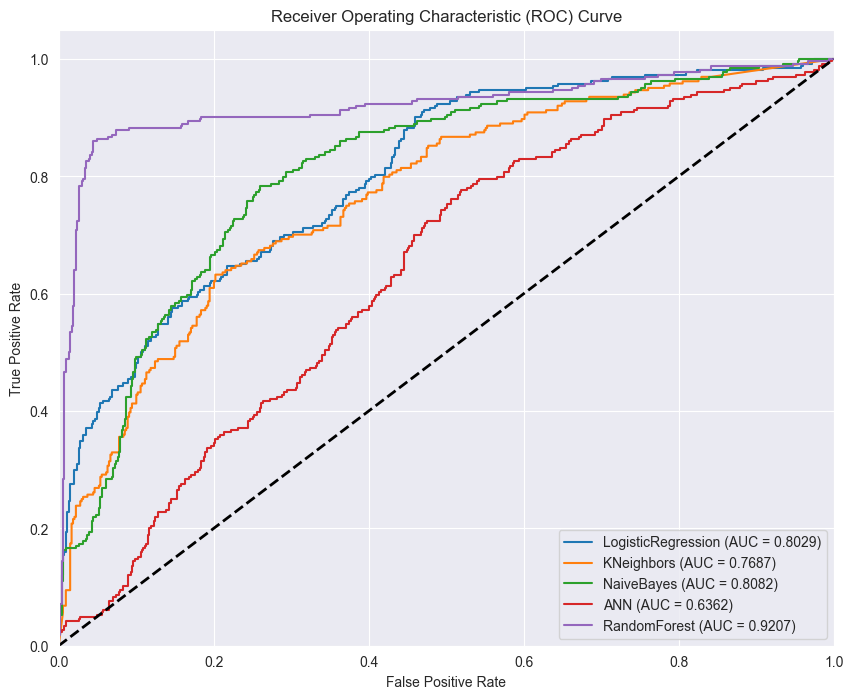

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Assuming binary or multiclass classification
n_classes = len(set(y_test))  # number of classes

# Binarize the output for multiclass
y_test_bin = label_binarize(y_test, classes=list(range(n_classes)))

# Plotting setup
plt.figure(figsize=(10, 8))

for classifier_name, best_model in best_models.items():
    print(f"Evaluating {classifier_name} on the test set...")

    y_pred = best_model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # If the model supports probability prediction
    if hasattr(best_model, "predict_proba"):
        y_pred_prob = best_model.predict_proba(X_test)
        if n_classes == 2:  # Binary classification case
            roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
            fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
        else:  # Multiclass classification
            roc_auc = roc_auc_score(y_test_bin, y_pred_prob, average="weighted", multi_class="ovr")
            fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())

        print(f"Test ROC AUC for {classifier_name}: {roc_auc:.4f}")

        # Plot ROC curve
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.4f})')

    print(f"Test Accuracy for {classifier_name}: {accuracy:.4f}")
    print(f"Test F1 Score for {classifier_name}: {f1:.4f}")
    print(f"Test Precision for {classifier_name}: {precision:.4f}")
    print(f"Test Recall for {classifier_name}: {recall:.4f}\n")

# Customize and show plot
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
# # Save the model
import joblib
import os

# Create the directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the best model as a pickle file and name it with models_label
joblib.dump(best_model, 'best_model_Rb_nobinned.pkl')

# Define the mapping variable and assign it a value
mapping = {'key1': 'value1', 'key2': 'value2'} # Example mapping, replace with your actual mapping
joblib.dump(mapping, 'mapping.pkl') # Save the mapping variable


# Save the column names as a pickle file
joblib.dump(X.columns, 'columns_Rb_nobinned.pkl')

['models/columns_Rb_nobinned.pkl']

In [53]:
import joblib

# Load the best model
best_model_loaded = joblib.load('best_model_Rb_nobinned.pkl')

# Load the mapping (if saved)
mapping_loaded = joblib.load('mapping.pkl')

# Load the column names (if saved)
columns_loaded = joblib.load('columns_Rb_nobinned.pkl')

# Print the loaded model, mapping, and column names
print("Best Model Loaded:\n", best_model_loaded)
print("\nMapping Loaded:\n", mapping_loaded)
print("\nColumn Names Loaded:\n", columns_loaded)


Best Model Loaded:
 RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=200)

Mapping Loaded:
 {'key1': 'value1', 'key2': 'value2'}

Column Names Loaded:
 Index(['AgeMonths', 'Size', 'WeightKg', 'Vaccinated', 'HealthCondition',
       'TimeInShelterDays', 'AdoptionFee', 'PreviousOwner',
       'Breed_Golden Retriever', 'Breed_Labrador', 'Breed_Parakeet',
       'Breed_Persian', 'Breed_Poodle', 'Breed_Rabbit', 'Breed_Siamese',
       'Color_Black', 'Color_Brown', 'Color_Gray', 'Color_Orange',
       'Color_White'],
      dtype='object')


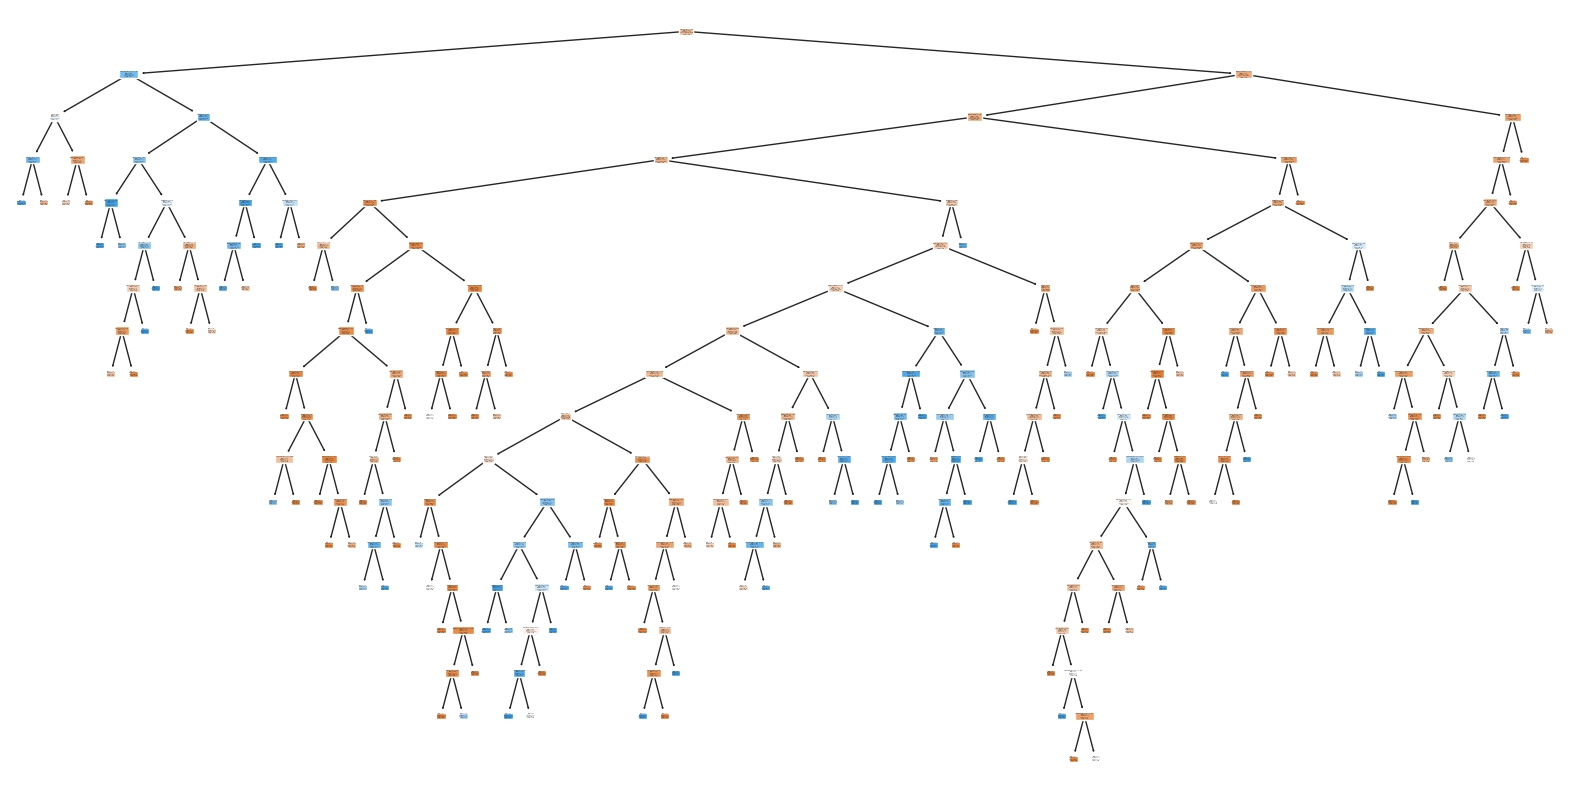

In [54]:
#drawing RandomForestClassifier(0)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
estimator = best_model_loaded.estimators_[0]  # best_model_loaded is RandomForestClassifier
plt.figure(figsize=(20, 10)) 
plot_tree(estimator, feature_names=columns_loaded, class_names=True, filled=True)
plt.show()
